In [1]:
import os
import networkx as nx
import matplotlib.pyplot as pl

In [12]:
% matplotlib inline

In [3]:
def ParseDirTree(tree=os.getcwd(),G=nx.Graph(),itr=0,maxItr=100,**kwds):
    colorDict = kwds.pop('colors',{'dir':'red','file':'magenta'})
    subTree,leaves=[],[]
    itr += 1
    knot = tree.pop(0)
    try:
        for x in os.listdir(knot):
            if x[0] != '.' and x[:2]!= '__':
                kx = os.path.join(knot,x)
                if os.path.isdir(kx):
                    #if kx[-1] !='/': kx+='/'
                    subTree.append(kx)
                else:
                    leaves.append(kx)
    except FileNotFoundError as e:
        return G
    if subTree:
        G.add_edges_from(map(lambda b:(knot,b,{'weight':1/len(subTree)}), subTree))
        for node in subTree:
            if node[-1] == '/':
                node = node[:-1]
            G.node[node]['color'] = colorDict['dir']#'red'
            G.node[node]['lbl'] = os.path.abspath(node).split('/')[-1]
        tree.extend(subTree)
    if leaves:
        G.add_edges_from(map(lambda b:(knot,b,{'weight': 1/len(leaves)}),leaves))
        for node in leaves:
            G.node[node]['color'] = colorDict['file']#'magenta'
            # add capacity to detect whether colorDict['file'] is a dict,
            # and if so assume keys of dict are file extensions used to assign
            # color according to file type.
            G.node[node]['lbl'] = os.path.abspath(node).split('/')[-1]   
    G.node[knot]['color'] = colorDict['dir']#'red'
    G.node[knot]['lbl'] = os.path.abspath(knot).split('/')[-1]
                         
    if tree and itr<=maxItr:
        return ParseDirTree(tree,G,itr,colors=colorDict)
    else:
        return G

In [4]:
root = ['/accounts/ekarakoy/idl']
G2 = ParseDirTree(root,colors={'dir':'black','file':'orange'})

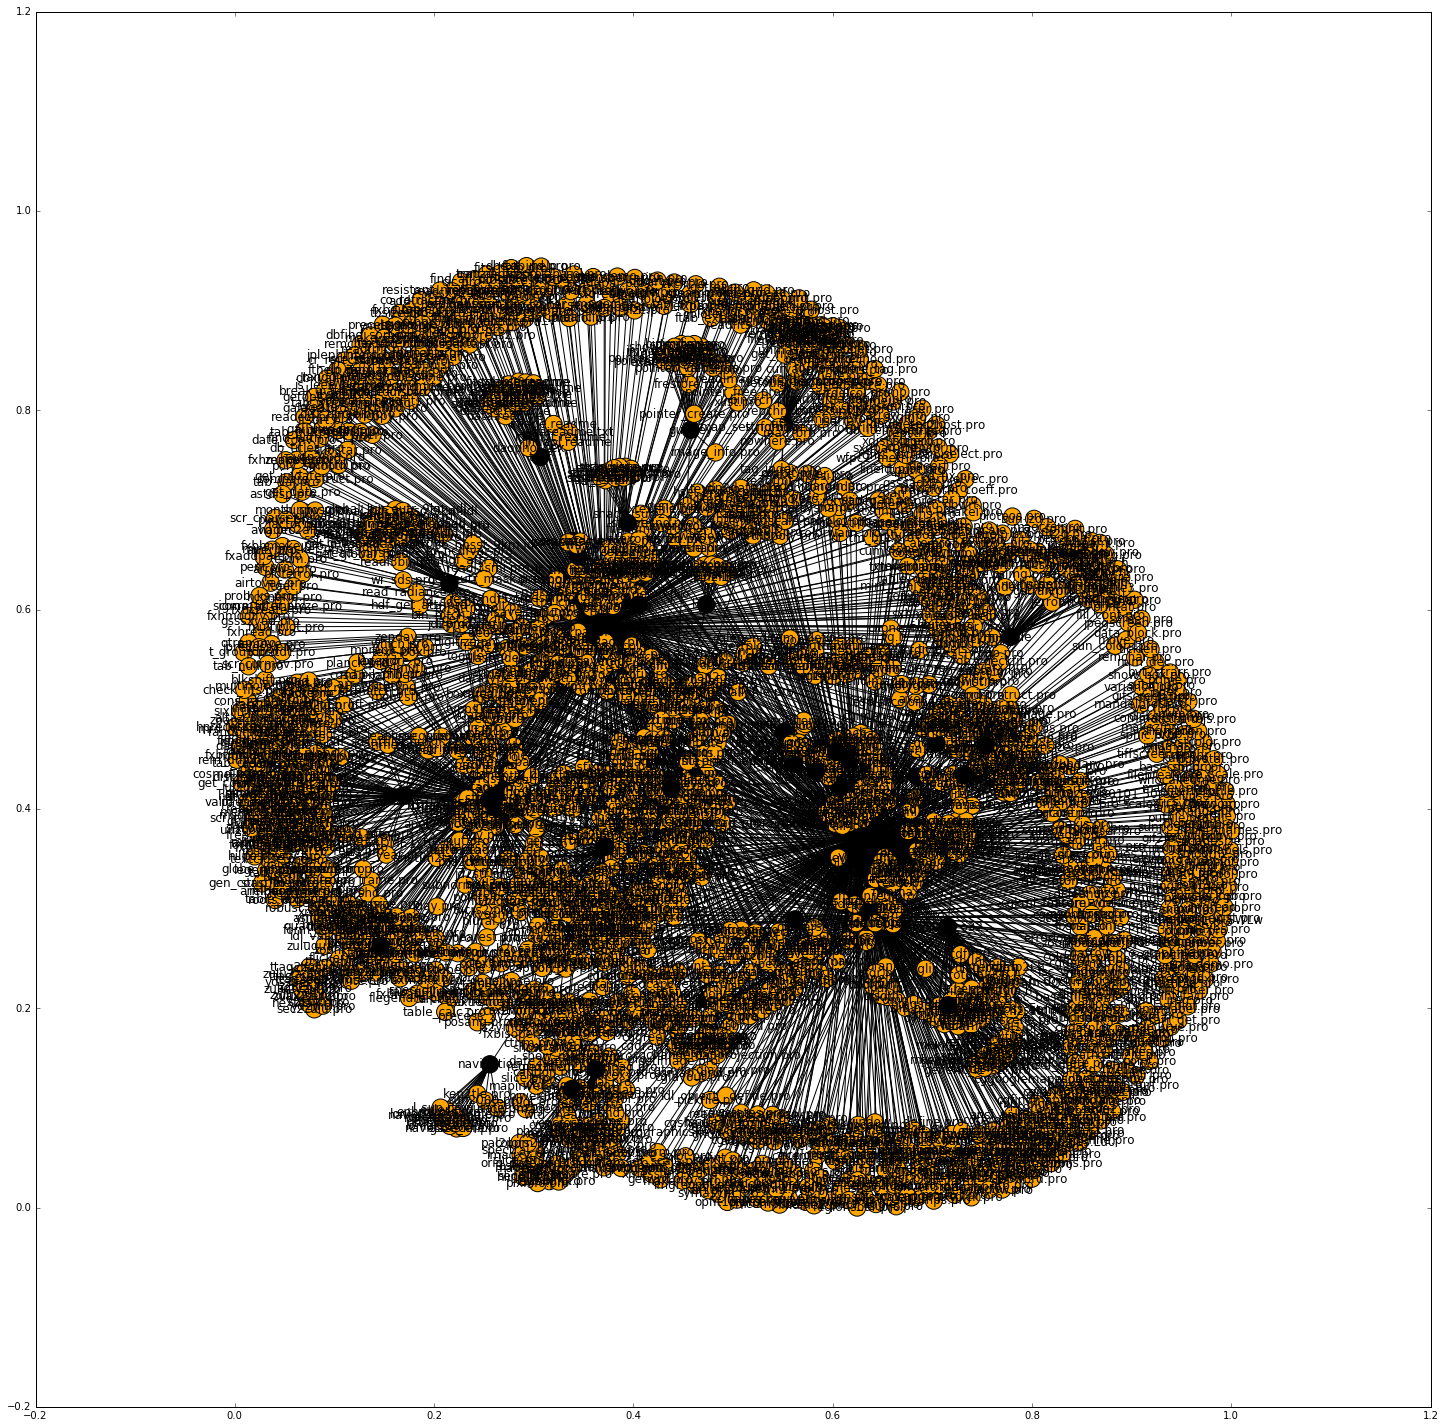

In [13]:
f,ax = pl.subplots(figsize=(25,25))
colors = [G2.node[node]['color'] for node in G2.nodes()]
lbls={node:G2.node[node]['lbl'] for node in G2.nodes()}
pos = nx.drawing.fruchterman_reingold_layout(G2)
nx.draw_networkx(G2,pos=pos,node_color=colors,labels=lbls,ax=ax)

In [14]:
% matplotlib qt

In [7]:
# EXPORT FOR GEPHI
nx.write_graphml(G2,'idl.graphml')

In [22]:
from bokeh.models import ColumnDataSource
from math import sqrt
from bokeh.plotting import show, figure
from bokeh.io import output_notebook
from bokeh.models import HoverTool

def get_edges_specs(_network, _layout):
    d = dict(xs=[], ys=[], alphas=[])
    #weights = [d['weight'] for u, v, d in _network.edges(data=True)]
    max_weight = 1 #max(weights)
    calc_alpha = lambda h: 0.1 + 0.6 * (h / max_weight)

    # example: { ..., ('user47', 'da_bjoerni', {'weight': 3}), ... }
    for u, v, data in _network.edges(data=True):
        d['xs'].append([_layout[u][0], _layout[v][0]])
        d['ys'].append([_layout[u][1], _layout[v][1]])
        d['alphas'].append(calc_alpha(data['weight']))
    return d
K = .1/sqrt(G2.number_of_nodes())
layout = nx.spring_layout(G2,k=K,iterations=100)
nodes, nodes_coordinates = zip(*sorted(layout.items()))
nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
colors = tuple([G2.node[node]['color'] for node in nodes])
lbl = tuple([G2.node[node]['lbl'] for node in nodes])
nodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,
                                     name=nodes,color=colors,label=lbl))

hover = HoverTool(tooltips=[('label', '@label')])
plot = figure(plot_width=800, plot_height=800,
              tools=['pan','tap', hover, 'box_zoom','wheel_zoom', 'reset'])
r_circles = plot.circle('x', 'y', source=nodes_source, size=10,color=colors,level='overlay')
                        #color='blue', level = 'overlay')



lines_source = ColumnDataSource(get_edges_specs(G2, layout))
r_lines = plot.multi_line('xs', 'ys', line_width=1.5,
                          alpha='alphas', color='navy',
                          source=lines_source)

In [23]:
output_notebook(); show(plot)

Loading BokehJS ...

In [18]:
K = .1/sqrt(G2.number_of_nodes())
layout = nx.fruchterman_reingold_layout(G2,k=K,iterations=100)
nodes, nodes_coordinates = zip(*sorted(layout.items()))
nodes_xs, nodes_ys = list(zip(*nodes_coordinates))
colors = tuple([G2.node[node]['color'] for node in nodes])
lbl = tuple([G2.node[node]['lbl'] for node in nodes])
nodes_source = ColumnDataSource(dict(x=nodes_xs, y=nodes_ys,
                                     name=nodes,color=colors,label=lbl))

hover = HoverTool(tooltips=[('label', '@label')])
plot = figure(plot_width=800, plot_height=800,
              tools=['tap', hover, 'box_zoom', 'reset'])
r_circles = plot.circle('x', 'y', source=nodes_source, size=10,color=colors,level='overlay')
                        #color='blue', level = 'overlay')

lines_source = ColumnDataSource(get_edges_specs(G2, layout))
r_lines = plot.multi_line('xs', 'ys', line_width=1.5,
                          alpha='alphas', color='navy',
                          source=lines_source)